<strong><font size="+3"> Introduction </font> </strong>

The purpose of the Data Generation module is to produce sample data to be analyzed later. Thus far, data $\vec{x_t}$ can be generated only from a set of maps of the form $\vec{x}_{t+1} = f(\vec{x}_t)$ or from a set of differential equations of the form $\vec{\dot{x}} = g(\vec{x_t})$ specified by the user. In the future, the Data Generation module should be expanded to include noisy systems.

Data Generation accesses two folders: datagen and datasets. The folder "datagen" contains saved data-generating objects.  The folder "datasets" contains saved data produced by a given data generator. These datasets can be later accessed for analysis using Pickle.

After this example, the Lorenz System with typical coefficients will be saved as "Lorenz_Typical_Generator.pickle" in the datagen folder. We'll also save 10,000 datapoints generated by this set of equations as "Lorenz_data_example.pickle." Finally, we'll generate data from the Henon map in just a few lines.

Let's start by importing the data generation module.

In [1]:
from dataGeneration import *

There are two basic classes in "dataGeneration:" "dataset" and "equationBasedDataGenerator." datasets contain data and some identifiers; equationBasedDataGenerators do the heavy lifting. Let's get a generator going.

<strong><font size="+3">Data Generating Objects </font></strong>

In [2]:
mySystem = diffEqDataGenerator('Lorenz_Typical')

A dataGeneration object has 3 primary attributes: "ID," "equations," and "symbols." The ID is a string that should be established at the declaration of the data generator. Symbols are a list of sympy symbols, one for each dimension. Equations is a list, equal in length to the number of dimensions, of sympy expressions.

The Lorenz system with typical coefficients is given by:

$\dot x = 10(y-x)$<br>
$\dot y = x(28-z)-y$<br>
$\dot z = xy-\frac{8}{3}z$

To define our system this way, we must first generate our dimensions/symbols:

In [3]:
mySystem.setSymbols(['x','y','z'])

Then set our equations:

In [4]:
xEquation = '10*(y-x)'
yEquation = 'x*(28-z)-y'
zEquation = 'x*y-8/3*z'
equationList = [xEquation,yEquation,zEquation]

mySystem.setEquations(equationList)

To verify that we've actually got the system of equations we set out to produce, we can print our data generator's "info:"

In [5]:
mySystem.info()

Equation Information: 
ID: Lorenz_Typical
Equations: 
/dot x = -10*x + 10*y
/dot y = x*(28 - z) - y
/dot z = x*y - 8*z/3
Sympy symbols:
x y z 



Not bad! We can also check the symbol names and equations of the system independently:

In [6]:
print('Our symbols:')
mySystem.printSymbols()
print('Now the equations:')
mySystem.printEquations()

Our symbols:
x y z 
Now the equations:
/dot x = -10*x + 10*y
/dot y = x*(28 - z) - y
/dot z = x*y - 8*z/3


Now we can easily generate as much data as we want. The first time we want to evolve the system, we must specify initial conditions, as well as optional "dt" (set to .001 by default) and "integrationMethod" (set to RK4 by default):

In [7]:
numPoints = 10000
initialConditions = [5,5,5]
mySystem.dt = .001

dataOut = mySystem.evolve(numPoints,initialConditions,integrationMethod = RK4)

After that, we can simply specify the number of desired steps (numPoints), and the generator will pick up where it left off:

In [8]:
secondBatchOfData = mySystem.evolve(1000)

Two more things:

1) Say I don't like the names of my variables. I can rename them, say from x, y, z, to i, j, k. <br>
2) When I'm done with my model, if I plan to play with it later, I can simply save it, and it will show up in the "datagen" folder. I can reload it using the Pickle module.

In [9]:
#Renaming variables
print('Before renaming:')
mySystem.info()

mySystem.renameSymbols(['i','j','k'])
print('After renaming:')
mySystem.info()


print('Reverting to original names...')
mySystem.renameSymbols(['x','y','z'])

#Saving our system
mySystem.save()

#Loading the system to a new set of equations
mySystemRevisited = loadDataGenerator('Lorenz_Typical')

Before renaming:
Equation Information: 
ID: Lorenz_Typical
Equations: 
/dot x = -10*x + 10*y
/dot y = x*(28 - z) - y
/dot z = x*y - 8*z/3
Sympy symbols:
x y z 

After renaming:
Equation Information: 
ID: Lorenz_Typical
Equations: 
/dot i = -10*i + 10*j
/dot j = i*(28 - k) - j
/dot k = i*j - 8*k/3
Sympy symbols:
i j k 

Reverting to original names...


This concludes the section on data generator objects; we now move to datasets.

<strong><font size="+3">Dataset Objects </font></strong>

We have our data! However, if the data is large enough, or simply inconvenient to produce, it's nice to be able to store it in a "dataset" object. As before, we'll start by declaring an object:

In [10]:
ID = 'Lorenz_data_example'
data = dataOut #from the previous section

lorenzData = dataset(data,'Lorenz_data_example')

A dataset object has a few attributes. The most important are "ID," "data," "dt," "componentNames," and "additionalInfo." When declaring a dataset object, the first argument is by default the data, then the identifier. You can declare a dataset without passing anything to it, too, but this isn't recommended.

If you want to use the "dataset" object for some custom data, there are a few structural requirements:

1) The data must be a list indexed first by component and second by time. <br>
2) The data must be composed of floats. <br>
3) At least for now, time series must be uniformly spaced in time.

Since my Lorenz data comes from ODEs, I'll set the value of dt for this dataset and save it:

In [11]:
lorenzData.dt = mySystem.dt
lorenzData.save()

There's a little additional functionality to the "dataset" class in the form of "dataset.info" and "dataset.plot." Let's see what it tells us about a given dataset:

In [12]:
lorenzData.info()

Dataset Information: 
ID: Lorenz_data_example
Component names: ['x0', 'x1', 'x2']
Length of series: 10001
dt = 0.001
Additional Info: {}



"plot" takes a single argument, a list of either components (strings) or indices (ints):

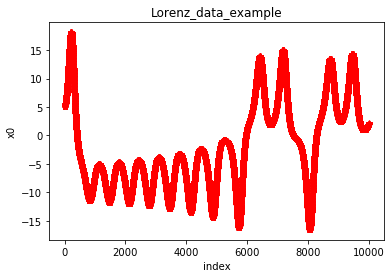

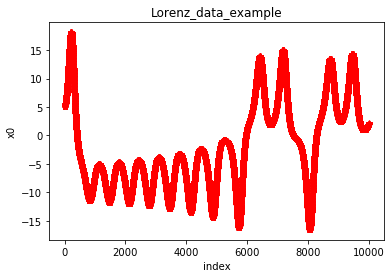

In [13]:
lorenzData.plot([0])
lorenzData.plot(['x0'])

"plot" can also be used to plot components against one another:

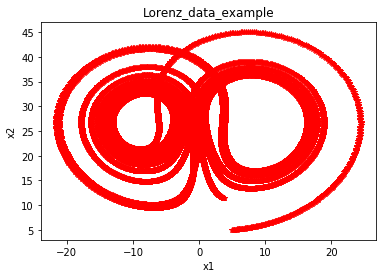

In [14]:
lorenzData.plot(['x1','x2'])

... in up to three dimensions.

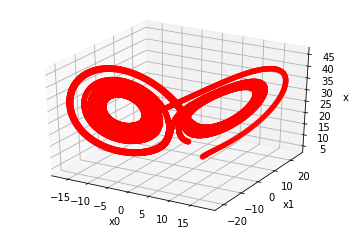

In [15]:
lorenzData.plot([0,1,2])

You can change the color of your plots, too, by changing the object attribute 'color.'

This concludes our overview of datasets. We'll save our dataset for future reference, this time naming it "Lorenz_10000" instead of its default ID, "Lorenz_data_example".

In [16]:

lorenzData.save('Lorenz_10000')


<strong><font size='+3'> Bringing It All Together </font></strong>

See how quickly we can produce and save 1) a data generator for the Henon map and 2) a dataset from this data generator.

In [17]:
henonGen = mapDataGenerator('Henon_Typical')
henonGen.setSymbols(['x','y'])
henonGen.setEquations(['1 - 1.4*x**2 + y','.3*x'])
henonGen.save()

In [18]:
dataOut = henonGen.evolve(1000,[0,0])
dataHenon = dataset(dataOut,'henon1000pts',['x','y'])
dataHenon.save()

This concludes the overview on data generators and data generation. Have fun!

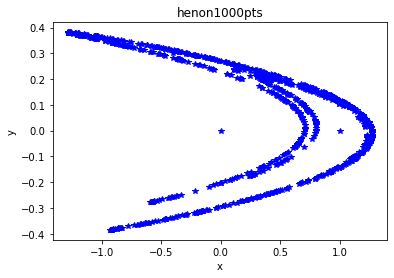

Adam Kunesh


In [19]:
dataHenon.additionalInfo['Author'] = 'Adam Kunesh'
dataHenon.color = 'blue'
dataHenon.plot([0,1])
print(dataHenon.additionalInfo['Author'])